In [93]:
# =============================== Task 1 ========================================

from __future__ import division
from __future__ import print_function
import pandas as pd

pd.set_option('display.multi_sparse', False)
from copy import deepcopy

graph = {
    'LymphNodes': [],
    'Metastasis': ['LymphNodes'],
    'BC': ['Metastasis','MC', 'SkinRetract', 'NippleDischarge', 'AD'],
    'MC': [],
    'Age': ['BC'],
    'Location': ['BC'],
    'BreastDensity': ['Mass'],
    'Mass': ['Size', 'Shape', 'Margin'],
    'Size': [],
    'Shape': [],
    'Margin': [],
    'Spiculation': ['Margin'],
    'FibrTissueDev': ['Spiculation', 'NippleDischarge', 'SkinRetract'],
    'NippleDischarge': [],
    'SkinRetract' : [],
    'AD' : ['FibrTissueDev'],
}

# Quiz Question
g = {
    'A': ['C'],
    'B': ['C', 'D'],
    'C': ['F', 'E'],
    'D': ['E'],
    'E': [],
    'F': []
}

# Question from slides
g__ = {
    'A': ['T'],
    'T': ['P'],
    'P': ['X', 'D'],
    'C': ['P'],
    'S': ['B', 'C'],
    'B': ['D'],
    'X': [],
    'D': []
}

# random question
g_ = {
    'U': ['W'],
    'V': ['W', 'X', 'T'],
    'W': ['Y'],
    'X': ['Y'],
    'T': ['Z'],
    'Z': [],
    'Y': []
}


def d_seperation(G, X, Y, Z):
    # using refine graph to apply the algorithm required by the assignment to get a refined graph
    temp_dict = refine_graph(G, X, Y,
                             Z)  # this is a recursive function which removes all the leaf nodes and the node that is not required.
    # creating a undirected graph after removing the nodes and the branches..
    new_dict = {}
    for key, value in temp_dict.items():
        for val in value:
            if key in new_dict:  # if key is there in  the dictionary, append the value, i.e. add an edge
                new_dict[key].append(val)
            else:
                new_dict[key] = [val]  # create a new key and add the vale, i.e. edge

            if val in new_dict:
                new_dict[val].append(key)  # create the edge back so that its an undirected graph
            else:
                new_dict[val] = [key]  # create the new key and add the edge.

    # new_dict is an undirect graph in place of the original graph
    x_list = X.split(',')
    y_list = Y.split(',')
    path = []
    # print(x_list,y_list)
    for x in x_list:
        for y in y_list:
            path += find_connection(new_dict, x, y)  # recursive path finding algorithm

    # print(path)
    if path == []:  # if no paths are found then that means that X and Y are d-seperated
        print(f"{X} and {Y} are d-seperated given {Z}")
    else:  # otherwise not
        print(f"{X} and {Y} are not d-seperated given {Z}")


def refine_graph(temp_dict, X, Y, Z):
    union = str(X) + '-' + str(Y) + '-' + str(Z)  # create a single string for better searching, typically X U Y U Z
    G = deepcopy(temp_dict)  # copy the dictionary as the key values are being changed at each iteration
    for key in G.keys():
        if len(G[key]) == 0:
            if key not in union:  # this means node is not in X U Y U Z
                temp_dict.pop(key, None)  # remove key as it is a leaf nodek
                for node in temp_dict.keys():
                    try:
                        temp_dict[node].remove(key)  # remove the existence of the leaf node from the graph
                    except ValueError:
                        pass
    G = deepcopy(temp_dict)  # copy the dictionary again
    for key in G.keys():
        if len(G[key]) == 0:  # check and see if there are any new leaf nodes created due to removal of leaf nodes
            if key not in union:  # there are new leaf nodes and the node is not in X U Y U Z
                temp_dict = refine_graph(temp_dict, X, Y, Z)  # recursive call
        else:
            continue

    # now the second step of the algorithm, remove the outgoing branches of node that is in Z.
    for key in temp_dict.keys():
        if key in Z:  # if the node is in Z, remove the branches
            temp_dict[key] = []  # replace the list with empty list to remove any outgoing branches from the key
    return temp_dict


def find_connection(g, X, Y, path=[]):
    path = path + [X]  # add the paths together
    if X == Y:  # base function that if start node==end node
        return path
    if X not in g:  # if Start node is not in the graph
        return []  # return empty list
    for node in g[X]:  # for all nodes in the values
        if node not in path:
            new_path = find_connection(g, node, Y, path)
            if new_path:
                return new_path
    return []  # return empty list


d_seperation(graph, 'U', 'V', 'Z')

U and V are d-seperated given Z


In [94]:
# =============================== Task 2 ========================================

#Get data from file, learn parameters
from collections import OrderedDict as odict
import pandas as pd
from itertools import product, combinations
import numpy as np
from tabulate import tabulate


#==================== Code from Week 3 Tutorial ====================================


def allEqualThisIndex(dict_of_arrays, **fixed_vars):
    """
    Helper function to create a boolean index vector into a tabular data structure,
    such that we return True only for rows of the table where, e.g.
    column_a=fixed_vars['column_a'] and column_b=fixed_vars['column_b'].
    
    This is a simple task, but it's not *quite* obvious
    for various obscure technical reasons.
    
    It is perhaps best explained by an example.
    
    >>> all_equal_this_index(
    ...    {'X': [1, 1, 0], Y: [1, 0, 1]},
    ...    X=1,
    ...    Y=1
    ... )
    [True, False, False]
    """
    # base index is a boolean vector, everywhere true
    first_array = dict_of_arrays[list(dict_of_arrays.keys())[0]]
    index = np.ones_like(first_array, dtype=np.bool_)
    for var_name, var_val in fixed_vars.items():
        index = index & (np.asarray(dict_of_arrays[var_name])==var_val)
    return index



def printFactor(f):
    """
    argument 
    `f`, a factor to print on screen
    """
    # Create a empty list that we will fill in with the probability table entries
    table = list()
    
    # Iterate over all keys and probability values in the table
    for key, item in f['table'].items():
        # Convert the tuple to a list to be able to manipulate it
        k = list(key)
        # Append the probability value to the list with key values
        k.append(item)
        # Append an entire row to the table
        table.append(k)
    # dom is used as table header. We need it converted to list
    dom = list(f['dom'])
    # Append a 'Pr' to indicate the probabity column
    dom.append('Pr')
    print(tabulate(table,headers=dom,tablefmt='orgtbl'))

def transposeGraph(G):
    GT = dict((v, []) for v in G)
    for v in G:
        for w in G[v]:
            if w in GT:
                GT[w].append(v)
            else:
                GT[w] = [v]
    return GT


# From Week 2 Tutorial
def estProbTable(data, var_name, parent_names, outcomeSpace):
    """
    Calculate a dictionary probability table by ML given
    `data`, a dictionary or dataframe of observations
    `var_name`, the column of the data to be used for the conditioned variable and
    `var_outcomes`, a tuple of possible outcomes for the conditiona varible and
    `parent_names`, a tuple of columns to be used for the parents and
    `parent_outcomes` a tuple of all possible parent outcomes 
    Return a dictionary containing an estimated conditional probability table.
    """    
    var_outcomes = outcomeSpace[var_name]
    parent_outcomes = [outcomeSpace[var] for var in (parent_names)]
    # cartesian product to generate a table of all possible outcomes
    all_parent_combinations = product(*parent_outcomes)

    prob_table = odict()
    
    for i, parent_combination in enumerate(all_parent_combinations):
        cond_array = []
        parent_vars = dict(zip(parent_names, parent_combination))
        parent_index = allEqualThisIndex(data, **parent_vars)
        for var_outcome in var_outcomes:
            var_index = (np.asarray(data[var_name])==var_outcome)
            prob_table[tuple(list(parent_combination)+[var_outcome])] = (var_index & parent_index).sum()/parent_index.sum() 
           
    return {'dom': tuple(list(parent_names)+[var_name]), 'table': prob_table}

#==================== End Tutorial Code ====================================



In [95]:

graph = {
    'LymphNodes': [],
    'Metastasis': ['LymphNodes'],
    'BC': ['Metastasis','MC', 'SkinRetract', 'NippleDischarge', 'AD'],
    'MC': [],
    'Age': ['BC'],
    'Location': ['BC'],
    'BreastDensity': ['Mass'],
    'Mass': ['Size', 'Shape', 'Margin'],
    'Size': [],
    'Shape': [],
    'Margin': [],
    'Spiculation': ['Margin'],
    'FibrTissueDev': ['Spiculation', 'NippleDischarge', 'SkinRetract'],
    'NippleDischarge': [],
    'SkinRetract' : [],
    'AD' : ['FibrTissueDev'],
}

graphT = transposeGraph(graph)

"""
Read the data, and return an outcomeSpace dictionary with
all of the different nodes, and their domains
"""
def getOutcomeSpace(data):
    
    nodes = []
    outcomes = []
    
    for x in data:
        nodes.append(x)
        count = 0
        diffList = []
        for val in data[x]:            
            if val not in diffList:
                count += 1
                diffList.append(val)        
        outcomes.append(diffList)
        
    outcomeSpace = {}
    for i in range(len(nodes)):
        outcomeSpace[nodes[i]] = tuple(outcomes[i])
    
   
    return dict(outcomeSpace)

def learn_bayes_net(graph, file, outcomeSpace, prob_tables):
    

    with open(file) as h:
        data = pd.read_csv(h)

    # possible outcomes, by variable
    outcomeSpace = getOutcomeSpace(data)
      

    prob_tables = odict()
    for node, parents in graphT.items():    
        prob_tables[node] = estProbTable(         # Estimate the probability for a single table. 1 line
            data,
            node,
            parents,
            outcomeSpace)

      
    return outcomeSpace, prob_tables

    
prob_tables = []
outcomeSpace = []

outcomeSpace, prob_tables = learn_bayes_net(graph, 'bc_2.csv', outcomeSpace, prob_tables)
printFactor(prob_tables['BC'])

data = []
with open('bc_2.csv') as h:
        data = pd.read_csv(h)

# =========================== End task 2 =====================================

| Age   | Location    | BC       |         Pr |
|-------+-------------+----------+------------|
| 35-49 | LolwOutQuad | No       | 0.762726   |
| 35-49 | LolwOutQuad | Invasive | 0.140394   |
| 35-49 | LolwOutQuad | Insitu   | 0.0968801  |
| 35-49 | UpOutQuad   | No       | 0.546699   |
| 35-49 | UpOutQuad   | Invasive | 0.198873   |
| 35-49 | UpOutQuad   | Insitu   | 0.254428   |
| 35-49 | UpInQuad    | No       | 0.653481   |
| 35-49 | UpInQuad    | Invasive | 0.160601   |
| 35-49 | UpInQuad    | Insitu   | 0.185918   |
| 35-49 | LowInQuad   | No       | 0.685275   |
| 35-49 | LowInQuad   | Invasive | 0.141586   |
| 35-49 | LowInQuad   | Insitu   | 0.173139   |
| 50-74 | LolwOutQuad | No       | 0.549206   |
| 50-74 | LolwOutQuad | Invasive | 0.30119    |
| 50-74 | LolwOutQuad | Insitu   | 0.149603   |
| 50-74 | UpOutQuad   | No       | 0.499797   |
| 50-74 | UpOutQuad   | Invasive | 0.303289   |
| 50-74 | UpOutQuad   | Insitu   | 0.196914   |
| 50-74 | UpInQuad    | No       | 0.493

In [96]:
#=================== Task 3 ==========================

import random

# Recursively find child nodes such that nodes first in the ordering have no more unvisited children.
def topologicalSortRec(G, v, ordering, visited):
    
    visited.append(v)
    for child in G[v]:  
        if child not in visited:
            topologicalSortRec(G, child, ordering, visited)
        
    ordering.insert(0, v)

#Find a topological ordering on the graph
def topologicalSort(graph):
    
    ordering = []
    visited = []
    
    for node in graph:
        if node not in visited:
            topologicalSortRec(graph, node, ordering, visited)
            
          
    return ordering  # return the stack - ordering on the graph
        
#Returns a table with the subset of entries to consider for sampling - based on evidence
def getSampleSpace(table, samples, node):
    
    keys = list(table['dom'])
    
    nodeIndex = keys.index(node)
    
    observed = []
    indexes = {}
    
    for i in samples:
        if i in keys:
            observed.append(i)
            indexes[keys.index(i)] = i
        
   
    space = []
    
    listTable = list(table['table'].items())
    
    #Iterate through the table values, and take the ones with the correct data
    for example in listTable:
        nodes = list(example[0])
        add = True
        for i in indexes.keys():        
            if nodes[i] != samples[indexes[i]]:
                add = False
                break
        #Add the row from the table with the correctly observed data
        if add == True:
            space.append(example)
            
      
    return space, nodeIndex
    
# Use a random number to generate a value from the outcomeSpace of var given the Sample Space probabilities
def sampleValue(sampleSpace, nodeIndex):
    
    
    rnd = random.random()
    
    lst = []
    names = {}
    for row in sampleSpace:
        lst.append(row[1])
        names[str(row[1])] = list(row[0])[nodeIndex]
           
    lst.sort()    

    lst.insert(0, 0)
   
    #Split up the probabilities into 'regions' for the rnd to fall into    
    regions = []
    sumVal = 0
    for i in range(1, len(lst)):
        sumVal += lst[i - 1]
        regions.append(lst[i] + sumVal)        
    
    lst.pop(0)
        
    for indx in range(len(regions)):
        if rnd < regions[indx]:
            chosen = indx
            break
   
    chosenVal = names[str(lst[chosen])]     
          
    return chosenVal
    
#Sample from the graph in topological order
def sample(graph, prob_tables):
    
    ordering = topologicalSort(graph)
    samples = {}
 
    for node in ordering:
        sampleSpace, nodeIndex = getSampleSpace(prob_tables[node], samples, node)

        val = sampleValue(sampleSpace, nodeIndex)
        samples[node] = val     

    return samples



In [97]:
# ================== Code from wk  3 tutorial ======================
def normalize(f):
    """
    argument 
    `f`, factor to be normalized.
    
    Returns a new factor f' as a copy of f with entries that sum up to 1
    """ 
    table = list()
    sum = 0
    for k, p in f['table'].items():
        sum = sum + p
    for k, p in f['table'].items():
        table.append((k, p/sum))
    return {'dom': f['dom'], 'table': odict(table)}

def prob(factor, *entry):
    """
    argument 
    `factor`, a dictionary of domain and probability values,
    `entry`, a list of values, one for each variable in the same order as specified in the factor domain.
    
    Returns p(entry)
    """

    return factor['table'][entry]     # insert your code here, 1 line    

def join(f1, f2, outcomeSpace):
    """
    argument 
    `f1`, first factor to be joined.
    `f2`, second factor to be joined.
    `outcomeSpace`, dictionary with the domain of each variable
    
    Returns a new factor with a join of f1 and f2
    """
    
    # First, we need to determine the domain of the new factor. It will be union of the domain in f1 and f2
    # But it is important to eliminate the repetitions
    common_vars = list(f1['dom']) + list(set(f2['dom']) - set(f1['dom']))
    
    # We will build a table from scratch, starting with an empty list. Later on, we will transform the list into a odict
    table = list()
    
    # Here is where the magic happens. The product iterator will generate all combinations of varible values 
    # as specified in outcomeSpace. Therefore, it will naturally respect observed values
    for entries in product(*[outcomeSpace[node] for node in common_vars]):
        
        # We need to map the entries to the domain of the factors f1 and f2
        entryDict = dict(zip(common_vars, entries))
        f1_entry = (entryDict[var] for var in f1['dom'])
        f2_entry = (entryDict[var] for var in f2['dom'])
        
        # Insert your code here
        p1 = prob(f1, *f1_entry)           # Use the fuction prob to calculate the probability in factor f1 for entry f1_entry 
        p2 = prob(f2, *f2_entry)           # Use the fuction prob to calculate the probability in factor f2 for entry f2_entry 
        
        # Create a new table entry with the multiplication of p1 and p2
        table.append((entries, p1 * p2))
    return {'dom': tuple(common_vars), 'table': odict(table)}



def p_joint(outcomeSpace, cond_tables, nodeList):
            
   
    if len(nodeList) < 2:
        return cond_tables
    
    """
    argument 
    `outcomeSpace`, dictionary with domain of each variable
    `cond_tables`, conditional probability distributions estimated from data
    
    Returns a new factor with full joint distribution
    """
    
    p = join(cond_tables[nodeList[0]],  cond_tables[nodeList[1]], outcomeSpace)
    for n in range(2, len(nodeList)):
        p = join(p, cond_tables[nodeList[n]], outcomeSpace)
   
    return p



def marginalize(f, var, outcomeSpace):
    """
    argument 
    `f`, factor to be marginalized.
    `var`, variable to be summed out.
    `outcomeSpace`, dictionary with the domain of each variable
    
    Returns a new factor f' with dom(f') = dom(f) - {var}
    """    
    
    # Let's make a copy of f domain and convert it to a list. We need a list to be able to modify its elements
    new_dom = list(f['dom'])
  
       
    #########################
    # Insert your code here #
    #########################
    new_dom.remove(var)   
    # Remove var from the list new_dom by calling the method remove(). 1 line
    table = list()                 # Create an empty list for table. We will fill in table from scratch. 1 line
    for entries in product(*[outcomeSpace[node] for node in new_dom]):
        s = 0;                     # Initialize the summation variable s. 1 line

        # We need to iterate over all possible outcomes of the variable var
        for val in outcomeSpace[var]:
            # To modify the tuple entries, we will need to convert it to a list
            entriesList = list(entries)
            # We need to insert the value of var in the right position in entriesList
            entriesList.insert(f['dom'].index(var), val)
            

            #########################
            # Insert your code here #
            #########################
            
            p = prob(f, *tuple(entriesList))     # Calculate the probability of factor f for entriesList. 1 line
            s = s + p                            # Sum over all values of var by accumulating the sum in s. 1 line
            
        # Create a new table entry with the multiplication of p1 and p2
        table.append((entries, s))
    return {'dom': tuple(new_dom), 'table': odict(table)}


def evidence(var, e, outcomeSpace):
    """
    argument 
    `var`, a valid variable identifier.
    `e`, the observed value for var.
    `outcomeSpace`, dictionary with the domain of each variable
    
    Returns dictionary with a copy of outcomeSpace with var = e
    """    
    newOutcomeSpace = outcomeSpace.copy()      # Make a copy of outcomeSpace with a copy to method copy(). 1 line
    newOutcomeSpace[var] = (e,)                # Replace the domain of variable var with a tuple with a single element e. 1 line
    return newOutcomeSpace

def query(p, outcomeSpace, q_vars, q_evi):
    """
    argument 
    `p`, probability table to query.
    `outcomeSpace`, dictionary will variable domains
    `q_vars`, list of variables in query head
    `q_evi`, dictionary of evidence in the form of variables names and values
    
    Returns a new factor NORMALIZED factor will all hidden variables eliminated as evidence set as in q_evi
    """     
    
    # Let's make a copy of these structures, since we will reuse the variable names
    pm = p.copy()
    outSpace = outcomeSpace.copy()
    
    # First, we set the evidence 
    for var_evi, e in q_evi.items():
        outSpace = evidence(var_evi, e, outSpace)
    
    # Second, we eliminate hidden variables NOT in the query
    for var in outSpace:
        if not var in q_vars:            
            pm = marginalize(pm, var, outSpace)
            
    return normalize(pm)

#=================== End tutorial code ===================================================

#Calculate full joint distribution for the queries
queryNodes = list(outcomeSpace.keys())
p = p_joint(outcomeSpace, prob_tables, queryNodes)

#Test Query
printFactor(query(p, outcomeSpace,['BC'], {'Age':'50-74', 'Location':'UpInQuad'}))


| BC       |       Pr |
|----------+----------|
| No       | 0.493585 |
| Invasive | 0.345229 |
| Insitu   | 0.161187 |


In [98]:
#Querying from a generated sample
def querySample(samples, var, var_evi, outcomeSpace, probTables):
    
    if len(samples) == 0:
        return
    
    if len(var) == 0:
        return
    
    #Get the structure for the frequencies table    
    parents = [a for a in var]
    parents.pop(0)
    frequencies = estProbTable(         # Estimate the probability for a single table. 1 line
            data,
            var[0],
            parents,
            outcomeSpace)
    
    count = 0
    
    #Initalise frequency dictionary
    for key, it in frequencies['table'].items():
        frequencies['table'][key] = 0
    
    for s in samples:
        discard = False
        for key, it in s.items():
            if key in var_evi:
                if var_evi[key] != it:                   
                    discard = True
                    break
       
                
        #Discard sample if disagrees with evidence          
        if discard == True:
            continue
        
        count += 1
        vals = []
        for v in frequencies['dom']:
            vals.append(s[v])
        
        vals = tuple(vals)
        frequencies['table'][vals] += 1
            
    for key, it in frequencies['table'].items():
        if count > 0:            
            frequencies['table'][key] /= count
        
    return frequencies


generatedSamples = []

import math
def getAnalysis(probsSample, probsBayes):
    
    sampledList = []
    bayesList = []
    
    s = []   

    mseSum = 0
    
    
    for samp in probsSample:
        for key, it in samp['table'].items():
            sampledList.append(samp['table'][key])
            
        
    for bayes in probsBayes:
        for key, it in bayes['table'].items():
            bayesList.append(bayes['table'][key])
    
    cnt = 0
    #Calculate Mean Squared Error
    for i in range(len(bayesList)):
        er = (bayesList[i] - sampledList[i])
        er = er * er
        mseSum += er
        cnt += 1
    if cnt > 0:
        mseSum /= cnt
        
    mseSum = math.sqrt(mseSum)
   
    #Plot probabilities
    %matplotlib notebook
    import matplotlib.pyplot as plt
    
    x = [a for a in range(len(sampledList))]
    
    plt.plot(x,sampledList)
    plt.plot(x,bayesList)
    plt.ylabel('Probability')
    plt.xlabel('Query Points')
    
    plt.legend(['SampledProbs', 'BayesNet Probs'], loc='upper left')


    plt.show()
        
    print("Mean Sqaured Error - " + str(mseSum))  
           
    return mseSum

# Generate 1000 Samples from forward sampling on the network
for x in range(1000):
    s = sample(graph, prob_tables)
    generatedSamples.append(s)
    
print(outcomeSpace)

{'BreastDensity': ('high', 'medium', 'low'), 'Location': ('LolwOutQuad', 'UpOutQuad', 'UpInQuad', 'LowInQuad'), 'Age': ('35-49', '50-74', '>75', '<35'), 'BC': ('No', 'Invasive', 'Insitu'), 'Mass': ('No', 'Benign', 'Malign'), 'AD': ('No', 'Yes'), 'Metastasis': ('no', 'yes'), 'MC': ('No', 'Yes'), 'Size': ('<1cm', '1-3cm', '>3cm'), 'Shape': ('Other', 'Oval', 'Round', 'Irregular'), 'FibrTissueDev': ('No', 'Yes'), 'LymphNodes': ('no', 'yes'), 'SkinRetract': ('No', 'Yes'), 'NippleDischarge': ('No', 'Yes'), 'Spiculation': ('No', 'Yes'), 'Margin': ('Well-defined', 'Ill-defined')}


C:\Users\Shashank\Anaconda3\lib\site-packages\ipykernel_launcher.py:98: RuntimeWarning: invalid value encountered in long_scalars


<IPython.core.display.Javascript object>


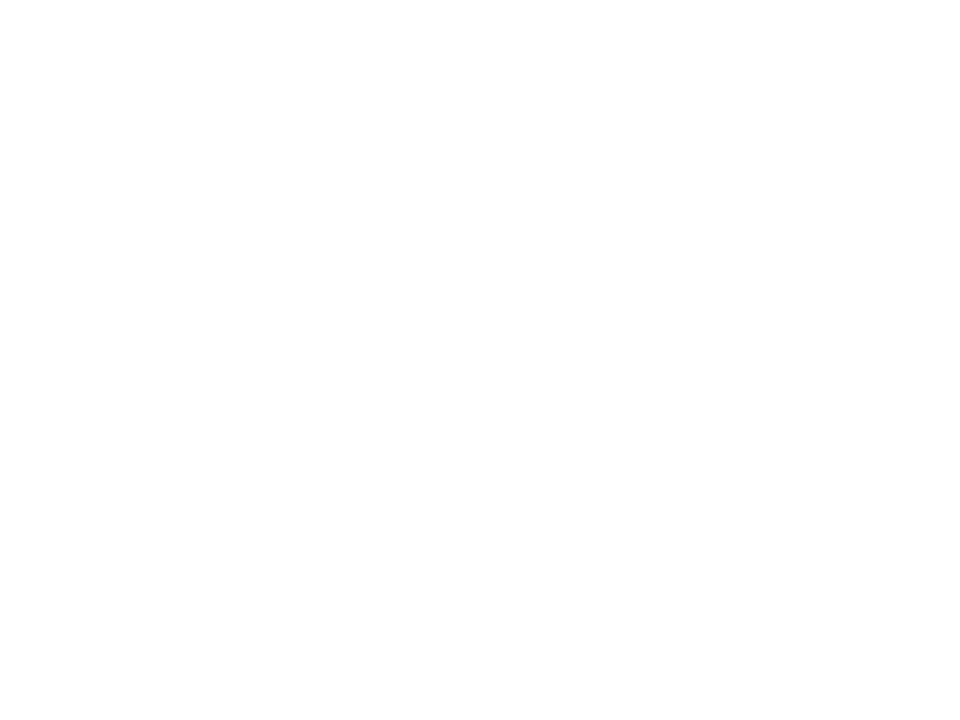

Mean Sqaured Error - 0.014365497305241504


0.014365497305241504

In [99]:
# ====== General Accuracy Comparison =======

queryVars = [['BC'], ['BC'], ['BC'], ['LymphNodes'],  ['LymphNodes'],  ['LymphNodes', 'BC'], \
                   ['LymphNodes', 'BC'], ['LymphNodes', 'BC', 'Mass'], ['SkinRetract'], ['NippleDischarge']]

queryEvidence = [{}, {'Age':'50-74'}, {'Age':'50-74', 'Location':'UpInQuad'},{}, {'Metastasis': 'no'}, \
                {'Metastasis': 'no', 'Location':'UpInQuad'}, {'Metastasis' :'no', 'Location': 'UpInQuad'}, \
                {'Age' : '50-74', 'BreastDensity': 'medium'}, {'BC' : 'No'}, {'FibrTissueDev': 'No'}]


#Get sample queries
probsSampled = []
for i in range(len(queryVars)):
    var = queryVars[i]
    evi = queryEvidence[i]
    probsSampled.append(querySample(generatedSamples, var, evi, outcomeSpace, prob_tables))

#Get bayesNet queries
probsBayes = []
for i in range(len(queryVars)):
    var = queryVars[i]
    evi = queryEvidence[i]
    probsBayes.append(query(p, outcomeSpace,var, evi))

#Graph the probabilities from the sampled and Bayes net - calculate MSE
getAnalysis(probsSampled, probsBayes)


In [100]:

# ========== Increasing Evidence Accuracy Comparison ==============

queryVars = [['LymphNodes', 'BC', 'Mass', 'SkinRetract', 'Margin'] for x in range(9)]

queryEvidence = [{}, {'Age':'50-74'}, {'Age':'50-74', 'Location':'UpInQuad'}, \
                {'Age':'50-74', 'Location':'UpInQuad'}, \
                {'Age':'50-74', 'Location':'UpInQuad', 'Metastasis': 'no'}, \
                {'Age':'50-74', 'Location':'UpInQuad', 'Metastasis': 'no'}, \
                {'Age':'50-74', 'Location':'UpInQuad', 'Metastasis': 'no', 'BreastDensity': 'medium'}, \
                {'Age':'50-74', 'Location':'UpInQuad', 'Metastasis': 'no', 'BreastDensity': 'medium', 'FibrTissueDev':'No'}, \
                {'Age':'50-74', 'Location':'UpInQuad', 'Metastasis': 'no', 'BreastDensity': 'medium', 'FibrTissueDev':'No', 'Spiculation': 'No' }]


#Get sample queries
probsSampled = []
for i in range(len(queryVars)):
    var = queryVars[i]
    evi = queryEvidence[i]
    probsSampled.append(querySample(generatedSamples, var, evi, outcomeSpace, prob_tables))
    


#Get bayesNet queries
probsBayes = []
for i in range(len(queryVars)):
    var = queryVars[i]
    evi = queryEvidence[i]
    probsBayes.append(query(p, outcomeSpace,var, evi))


#Graph the probabilities from the sampled and Bayes net - calculate MSE
getAnalysis(probsSampled, probsBayes)
#================================= End task 3 ==================================


C:\Users\Shashank\Anaconda3\lib\site-packages\ipykernel_launcher.py:98: RuntimeWarning: invalid value encountered in long_scalars


<IPython.core.display.Javascript object>

Mean Sqaured Error - 0.032216447019218754


0.032216447019218754

In [101]:
# ===================================Task 4 ML Classifier =======================================

'''
This is the task 4  which is done with ML classifiers (KNN, RFC)
Comments to be updated later
'''

from __future__ import division
from __future__ import print_function

# Necessary libraries
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

input_file = 'resources/bc_2.csv'

with open(input_file) as f:
    data = pd.read_csv(f)

print(data.head())
print(data.shape)

  BreastDensity     Location    Age        BC    Mass  AD Metastasis   MC  \
0          high  LolwOutQuad  35-49        No      No  No         no   No   
1        medium    UpOutQuad  50-74  Invasive  Benign  No        yes  Yes   
2           low     UpInQuad  50-74  Invasive  Benign  No        yes   No   
3        medium    LowInQuad    >75  Invasive  Malign  No        yes  Yes   
4          high    LowInQuad    <35        No  Benign  No         no   No   

    Size  Shape FibrTissueDev LymphNodes SkinRetract NippleDischarge  \
0   <1cm  Other            No         no          No              No   
1   <1cm   Oval            No        yes          No             Yes   
2  1-3cm  Other           Yes        yes         Yes              No   
3   <1cm  Round            No         no          No              No   
4   >3cm   Oval            No         no          No              No   

  Spiculation        Margin  
0          No  Well-defined  
1          No  Well-defined  
2         Yes 

In [102]:
le = LabelEncoder()
data_encode = data.copy()
for col in data_encode.columns:
    data_encode[col] = le.fit_transform(data_encode[col])

print(data_encode.head())
print(data.head())

Y = data_encode["BC"]
X = data_encode.drop(["BC"], axis=1)
print(X.shape)

seed = 10
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=0.2, random_state=seed)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

print(X_train.shape)

# K Nearest Neighbor
count = 0
nob = 15
neighbors = range(1, nob)
for neighbor in neighbors:
    knn = KNeighborsClassifier(n_neighbors=neighbor)
    knn.fit(X_train, Y_train)
    knn_score = round(knn.score(X_train, Y_train) * 100, 2)
    print('KNN Score for number of neighbors {} is {}: \n'.format(neighbor, knn_score))

    # Predict Output
    predicted = knn.predict(X_test)

    # Accuracy Score of KNN
    if neighbor > 10:
        a = accuracy_score(Y_test, predicted)
        if neighbor is 18:
            print("Classification Report :")
            print(classification_report(Y_test, predicted))
            conf2 = confusion_matrix(Y_test, predicted)
            print(conf2)
        count = count + a
        print('Accuracy Score for KNN with number of neighbors {} is {}: \n'.format(neighbor, a))
    else:
        print('Accuracy Score for KNN with number of neighbors {} is {}: \n'.format(neighbor,
                                                                                    accuracy_score(Y_test, predicted)))

print('The average accuracy is {}'.format((count / (nob - 10))))


# Random Forest
rf = RandomForestClassifier(max_depth=5, n_estimators=100, random_state=0)
rf.fit(X_train, Y_train)
print("Accuracy of Random Forest Classifier on training set: {:.3f}".format(rf.score(X_train, Y_train)))

predictions_rf = rf.predict(X_test)

# Accuracy Score of LG
print("Accuracy Score on prediction is:")
print(accuracy_score(Y_test, predictions_rf))
# Classification Report
print("Classification Report on RFC :")
print(classification_report(Y_test, predictions_rf))
conf5 = confusion_matrix(Y_test, predictions_rf)
print(conf5)


   BreastDensity  Location  Age  BC  Mass  AD  Metastasis  MC  Size  Shape  \
0              0         0    0   2     2   0           0   0     1      1   
1              2         3    1   1     0   0           1   1     1      2   
2              1         2    1   1     0   0           1   0     0      1   
3              2         1    3   1     1   0           1   1     1      3   
4              0         1    2   2     0   0           0   0     2      2   

   FibrTissueDev  LymphNodes  SkinRetract  NippleDischarge  Spiculation  \
0              0           0            0                0            0   
1              0           1            0                1            0   
2              1           1            1                0            1   
3              0           0            0                0            0   
4              0           0            0                0            1   

   Margin  
0       1  
1       1  
2       1  
3       0  
4       0  
  Breast

C:\Users\Shashank\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Shashank\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int32 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\Shashank\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: Data with input dtype int32 were all converted to float64 by StandardScaler.


KNN Score for number of neighbors 1 is 96.46: 

Accuracy Score for KNN with number of neighbors 1 is 0.86: 

KNN Score for number of neighbors 2 is 91.33: 

Accuracy Score for KNN with number of neighbors 2 is 0.833: 

KNN Score for number of neighbors 3 is 92.49: 

Accuracy Score for KNN with number of neighbors 3 is 0.88425: 

KNN Score for number of neighbors 4 is 91.94: 

Accuracy Score for KNN with number of neighbors 4 is 0.878: 

KNN Score for number of neighbors 5 is 91.57: 

Accuracy Score for KNN with number of neighbors 5 is 0.88825: 

KNN Score for number of neighbors 6 is 91.24: 

Accuracy Score for KNN with number of neighbors 6 is 0.887: 

KNN Score for number of neighbors 7 is 91.21: 

Accuracy Score for KNN with number of neighbors 7 is 0.89125: 

KNN Score for number of neighbors 8 is 91.06: 

Accuracy Score for KNN with number of neighbors 8 is 0.8925: 

KNN Score for number of neighbors 9 is 91.04: 

Accuracy Score for KNN with number of neighbors 9 is 0.894: 

KNN 

In [103]:
# ===================================Task 4 Bayesian Network =======================================
data.head()

,BreastDensity,Location,Age,BC,Mass,AD,Metastasis,MC,Size,Shape,FibrTissueDev,LymphNodes,SkinRetract,NippleDischarge,Spiculation,Margin
0,high,LolwOutQuad,35-49,No,No,No,no,No,<1cm,Other,No,no,No,No,No,Well-defined
1,medium,UpOutQuad,50-74,Invasive,Benign,No,yes,Yes,<1cm,Oval,No,yes,No,Yes,No,Well-defined
2,low,UpInQuad,50-74,Invasive,Benign,No,yes,No,1-3cm,Other,Yes,yes,Yes,No,Yes,Well-defined
3,medium,LowInQuad,>75,Invasive,Malign,No,yes,Yes,<1cm,Round,No,no,No,No,No,Ill-defined
4,high,LowInQuad,<35,No,Benign,No,no,No,>3cm,Oval,No,no,No,No,Yes,Ill-defined


In [104]:
train_split = 0.8 #Divding the train to 80 percent
train_data = data.loc[0:data.shape[0]*train_split-1, :]
test_data = data.loc[data.shape[0]*train_split:, :]
print(train_data.shape)
print(test_data.shape)

(16000, 16)
(4000, 16)


In [105]:
train_csv = train_data.to_csv('train.csv', index = None, header=True)

In [106]:
outcomeSpace, train_prob_tables = learn_bayes_net(graphT, 'train.csv', outcomeSpace, prob_tables)
test_p = p_joint(outcomeSpace, train_prob_tables)

In [107]:
printFactor(train_prob_tables['BC'])

| Age   | Location    | BC       |         Pr |
|-------+-------------+----------+------------|
| 35-49 | LolwOutQuad | No       | 0.764463   |
| 35-49 | LolwOutQuad | Invasive | 0.13843    |
| 35-49 | LolwOutQuad | Insitu   | 0.0971074  |
| 35-49 | UpOutQuad   | No       | 0.548682   |
| 35-49 | UpOutQuad   | Invasive | 0.192698   |
| 35-49 | UpOutQuad   | Insitu   | 0.258621   |
| 35-49 | UpInQuad    | No       | 0.652568   |
| 35-49 | UpInQuad    | Invasive | 0.159114   |
| 35-49 | UpInQuad    | Insitu   | 0.188318   |
| 35-49 | LowInQuad   | No       | 0.691131   |
| 35-49 | LowInQuad   | Invasive | 0.133537   |
| 35-49 | LowInQuad   | Insitu   | 0.175331   |
| 50-74 | LolwOutQuad | No       | 0.542716   |
| 50-74 | LolwOutQuad | Invasive | 0.307654   |
| 50-74 | LolwOutQuad | Insitu   | 0.14963    |
| 50-74 | UpOutQuad   | No       | 0.506042   |
| 50-74 | UpOutQuad   | Invasive | 0.296073   |
| 50-74 | UpOutQuad   | Insitu   | 0.197885   |
| 50-74 | UpInQuad    | No       | 0.491

In [108]:
print(test_data.shape)


(4000, 16)


In [109]:
test_data.iloc[0]

BreastDensity           medium
Location             UpOutQuad
Age                        >75
BC                      Insitu
Mass                    Benign
AD                         Yes
Metastasis                  no
MC                         Yes
Size                     1-3cm
Shape                    Round
FibrTissueDev              Yes
LymphNodes                  no
SkinRetract                Yes
NippleDischarge            Yes
Spiculation                Yes
Margin             Ill-defined
Name: 16000, dtype: object

In [110]:
target = test_data["BC"]
test_X = test_data.drop(["BC"], axis=1)
test_evidence = odict()
print(test_X.shape)
y = test_X.iloc[0:1]
test_column = list(test_X.columns)
print(len(test_column))
print(y.shape)
for i in range(y.shape[0]):
    for j in range(y.shape[1]):
        print(j)
        test_evidence[test_column[j]] = test_data.iloc[i][test_column[j]]
    printFactor(query(train_prob_tables, outcomeSpace, 'BC', test_evidence))

(4000, 15)
15
(1, 15)
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14


KeyError: 'dom'

In [ ]:
target = data_encode["BC"]
test_X = data_encode.drop(["BC"], axis=1)
test_evidence = odict()
print(test_X.shape)
test_X.iloc[0]
test_column = list(test_X.columns)
print(len(test_column))
for i in range(test_data.shape[0]):
    for j in range(test_data.shape[1]):
        test_evidence[test_column[j]] = test_data.iloc[i][test_column[j]]
    printFactor(query(train_prob_tables, outcomeSpace, 'BC', test_evidence))